# Initial database
For more information on the pyECG module: 
https://www.researchgate.net/publication/331012096_PyECG_A_software_tool_for_the_analysis_of_the_QT_interval_in_the_electrocardiogram

https://pypi.org/project/pyECG/

In [1]:
# Importing packages
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecg import ECGRecord

## WFDB file formats
### Header files
The record line
E.g. S0250ECG 8 1000 1256376 15:26:59 2006
- Record name: S0250ECG
- Number of signals: 8
- Sampling frequency (in samples per second per signal): 1000
- Number of samples per signal: 1256376
- Base time (time of day corresponding with the beginning of the record): 15:26:59
- Base date: 2006 (this is in the wrong format in the database, a quick fix is just removing it from the header but this may be annoying)

Signal specification lines
Each of the non-empty, non-comment lines following the record line represent 1 signal.
E.g. S0250ECG.dat 16 1(0)/uV 16 0 -88 25184 0 ecg_0
- File name (of where the signal is stored): S0250ECG.dat
- Format: 16-bit-amplitudes (see documentation on signal files)
- ADC gain: 1 (uV)
- Baseline: 0 (uV)
- ADC resolution (bits): 16
- ADC zero: 0
- initial value (of signal): -88
- checksum (used to verify that the file hasn't been corrupted): 25184
- block size: 0
- Description: 'ecg_0'

For more information on header files: https://archive.physionet.org/physiotools/wag/header-5.htm

### Signal files...
Info can be found here: https://archive.physionet.org/physiotools/wag/signal-5.htm

## Initial setup
### Getting a table of patients with associated ECG readings (run one of these)

In [ ]:
### Only needed to write this once, from now on just run the cell bellow

# List of patient IDs with ECG readings 
pat_list = []
with open("database/data_description/GE-75_files_per_subject.csv") as file:
    csv_reader = csv.reader(file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0: #Finding the ECG column
            ECG_index = row.index('ECG')
            line_count = 1
        else:
            if row[ECG_index] == '1': pat_list.append(row[0]) 

# Importing all other patient variables into a dataframe
df_csv = pd.read_csv('./database/data_description/GE-75_data_summary_table.csv', encoding = 'latin-1')
df_csv = df_csv.loc[df_csv['patient ID'].isin(pat_list)]
df_csv.set_index('patient ID', inplace=True)

# 6 Controls and 45 Diabetics from the 88 initial total
# Now saving this as a new file for future use
df_csv.to_csv('./database/data_description/ECG_data_summary_table.csv')

In [2]:
df_csv = pd.read_csv('./database/data_description/ECG_data_summary_table.csv', encoding = 'latin-1')
df_csv.set_index('patient ID', inplace=True)
df_csv

,study,Group,template,Diabetes Duration,HTN or not,HTN2,age,sex,Gender,HEIGHT (M),...,Clock: Memory,Clock: Ex Funct.,Clock: Total Score,WTAR: Raw Score,WTAR: Std Score,BADS Total Responses,GDS Total Response,IADL,MMSE Total,MMSE: Comp Norms
patient ID,,,,,,,,,,,,,,,,,,,,,
S0250,GE75,DM,NaN,7.0,NaN,NaN,50,Male,NaN,1.790,...,4.0,4.0,8.0,24.0,86.0,30.0,20.0,1.0,27.0,28.0
S0256,GE75,DM,Modified,23.0,ntn,NaN,65,Female,NaN,1.575,...,3.0,3.0,6.0,44.0,117.0,0.0,2.0,2.0,30.0,29.0
s0273,GE75,DM,Modified,16.0,HTN,NaN,68,Male,NaN,1.807,...,2.0,4.0,6.0,49.0,125.0,2.0,7.0,0.0,29.0,29.0
s0282,GE75,DM,NaN,1.0,NaN,NaN,62,Female,NaN,1.608,...,2.0,3.0,5.0,46.0,120.0,10.0,5.0,1.0,27.0,29.0
s0283,GE75,CONTROL,Modified,0.0,ntn,NaN,83,Female,NaN,1.520,...,2.0,2.0,4.0,37.0,108.0,1.0,7.0,1.0,25.0,27.0
s0287,GE75,DM,Modified,18.0,HTN,NaN,73,Female,NaN,1.620,...,3.0,4.0,7.0,35.0,104.0,0.0,3.0,2.0,28.0,28.0
s0288,GE75,DM,Modified,2.0,HTN,NaN,73,Male,NaN,1.602,...,2.0,4.0,6.0,50.0,126.0,5.0,9.0,1.0,28.0,28.0
s0292,GE75,DM,Modified,5.0,ntn,NaN,66,Female,NaN,1.600,...,4.0,4.0,8.0,46.0,120.0,0.0,0.0,1.0,29.0,29.0
s0296,GE75,DM,Modified,9.0,HTN,NaN,71,Female,NaN,1.570,...,4.0,4.0,8.0,29.0,95.0,4.0,3.0,0.0,29.0,27.0


## Visualising the data present (optional to run)
### Loading ECG data into dataframe

In [104]:
path = "./database/ecgdata/" #Change the location of the file or folder.
files = sorted(os.listdir(path))
#files.pop(0)
dataset = []
lead_names = ['ecg_0','ecg_1']
times = [] # For looking at signal lengths, + time of day

df_ecg = pd.DataFrame (columns = dataset)

for file in files:
    if file.endswith('.hea'):
        #Reading and storing the data into a dataframe.
        hea_path = path + file #Change the location of the file or folder.
        record = ECGRecord.from_wfdb(hea_path)
        
        #Getting important info from the header
        f = open(hea_path, "r")
        f_line = f.readline().split()
        times.append([f_line[0], f_line[3], f_line[4]])
        
        #Using pyECG Library
        for lead in lead_names:
            signal = record.get_lead(lead)
            df_ecg[file + "/" + lead] = pd.Series(signal)
            
df_ecg

[['S0250ECG', '1256376', '15:26:59'], ['S0256ECG', '1428810', '16:00:29'], ['S0273ECG', '2800068', '01:26:41'], ['S0282ECG', '1087212', '01:14:53'], ['S0283ECG', '1513644', '15:35:15'], ['S0287ECG', '2303796', '16:03:51'], ['S0288ECG', '1187376', '17:01:23'], ['S0292ECG', '1374270', '15:42:51'], ['S0296ECG', '1524222', '15:25:39'], ['S0300ECG', '1585698', '16:04:40'], ['S0301ECG', '1046376', '17:01:22'], ['S0304ECG', '1812090', '14:45:50'], ['S0308ECG', '1592712', '15:48:58'], ['S0310ECG', '2130372', '15:19:16'], ['S0312ECG', '1850046', '15:12:37'], ['S0314ECG', '1823196', '15:39:13'], ['S0315ECG', '1171740', '14:51:54'], ['S0316ECG', '1462428', '14:56:50'], ['S0317ECG', '1437288', '12:52:27'], ['S0318ECG', '2047950', '14:24:33'], ['S0326ECG', '1658730', '14:16:00'], ['S0327ECG', '1553022', '14:39:02'], ['S0339ECG', '1230696', '13:33:23'], ['S0342ECG', '1520016', '13:49:33'], ['S0349ECG', '1598286', '14:51:24'], ['S0365ECG', '1004274', '14:20:19'], ['S0366ECG', '1262508', '14:38:05'], 

### Loading Large ECG data into dataFrame

In [95]:
path = "./database/ecgdata/large_ecg/" #Change the location of the file or folder.
files = sorted(os.listdir(path))

for file in files:
    if file.endswith('.hea'):
        #Reading and storing the data into a dataframe.
        hea_path = path + file #Change the location of the file or folder.
        

        record = ECGRecord.from_wfdb(hea_path)
        for lead in lead_names:
            time = record.time
            signal = record.get_lead(lead)
            database_ecg[file + "/" + lead] = pd.Series(signal)
database_ecg   

S0403ECG 8 1000 58338090 14:44:38 
S0403ECG.dat 16 1(0)/uV 16 0 1199 13953 0 ecg_0
S0403ECG.dat 16 1(0)/uV 16 0 22 60318 0 ecg_1
S0403ECG.dat 16 1(0)/uV 16 0 8908 45595 0 sensor_0
S0403ECG.dat 16 1(0)/uV 16 0 4687 29331 0 sensor_1
S0403ECG.dat 16 1(0)/uV 16 0 4 5775 0 emg_0
S0403ECG.dat 16 1(0)/uV 16 0 0 56393 0 emg_1
S0403ECG.dat 16 1(0)/uV 16 0 202 12802 0 accelerometer_0
S0403ECG.dat 16 1(0)/uV 16 0 53 28772 0 accelerometer_1



NameError: name 'database_ecg' is not defined

### Loading entire readings + Deleting wrongly formatted date (already run, now unnecessary)

In [ ]:
#Deleting the '2006' string to be able to read the data.
for file in files:
    if file.endswith('.hea'):
        for lead in lead_names:
            dataset.append(file + "/" + lead)
        fin = open(path + file,"rt") #Change the location of the file or folder.
        data_file = fin.read()
        # More efficient way of doing this would be to delete the last number in the top line of each file
        data_file = data_file.replace('2006','')
        data_file = data_file.replace('2007','')
        data_file = data_file.replace('2008','')
        fin = open(path + file,"wt") #Change the location of the file or folder.
        fin.write(data_file)
        fin.close()

### Some initial info

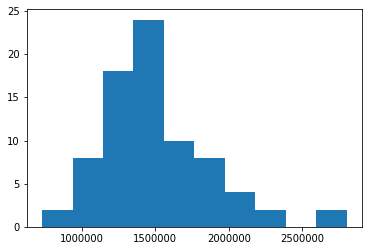

In [79]:
# Length of the readings
hist1 = plt.hist(times)

[-28.773781097378492, -26.850534394162256, -44.92027227517877, -45.959227969970776, 0.08516405916703115, 0.10196580482275888, 8.375916564570664, 9.73821940891013, 8.231846198908608, 10.157204531127624, 8.19238746999306, 10.765368806790324, 8.47129300238509, 10.097654828798966, 8.906765172209594, 10.459171458225882, 8.400428693321107, 10.154121855240788, 8.936548453647633, 10.69962893273988, 8.395898797373029, 10.020134253843743, 8.084797067120034, 10.195678682177947, 8.46218011168631, 10.218158417543792, 8.180188892497151, 10.07313495323056, 8.22412558024031, 10.13879204951384, 8.312614217399886, 9.962566142619725, 7.970316793827982, 9.816023179203578, 8.301657306411457, 9.969482861818436, 8.325955764834731, 10.094361082987895, 8.501039497729979, 10.331314033378543, 390.28240829178526, 15.514827567543474, 157.94848357498074, 231.25112147955707, -12.540919934736117, 10.326913388846636, 8.453053862856342, 9.919609257101378, 8.63031608372016, 10.146839799550452, 8.489243971266806, 10.1273

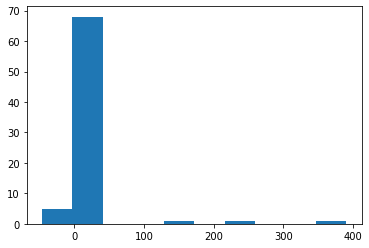

In [87]:
# Average amplitude
av_amp = []

for column in df_ecg:
    av_amp.append(sum(df_ecg[column].dropna())/len(df_ecg[column].dropna()))

del av_amp[-3]
del av_amp[-3]
print(av_amp)
hist2 = plt.hist(av_amp)

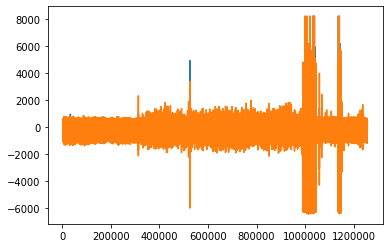

In [133]:
# visualise the 250 ecgs
df_ecg["S0250ECG.hea/ecg_0"].plot()
df_ecg["S0250ECG.hea/ecg_1"].plot()

#df_ecg["S0250ECG.hea/ecg_0"][0:2000].plot()
#df_ecg["S0250ECG.hea/ecg_1"][0:2000].plot()
#plt.hold(True)

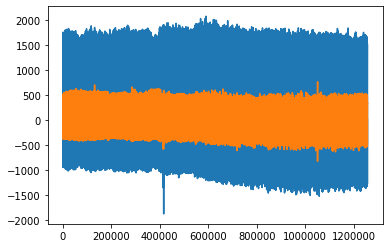

In [134]:
# CONTROL
#df_ecg["S0283ECG.hea/ecg_0"][0:5000].plot()
#df_ecg["S0283ECG.hea/ecg_1"][0:5000].plot()

df_ecg["S0283ECG.hea/ecg_0"].plot()
df_ecg["S0283ECG.hea/ecg_1"].plot()

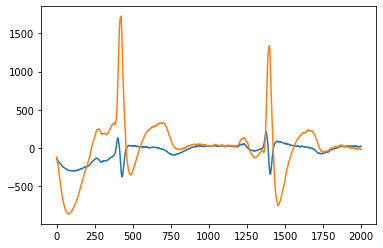

In [92]:
# Diabetic #2
df_ecg["S0282ECG.hea/ecg_0"][0:2000].plot()
df_ecg["S0282ECG.hea/ecg_1"][0:2000].plot()

#df_ecg["S0282ECG.hea/ecg_0"].plot()
#df_ecg["S0282ECG.hea/ecg_1"].plot()

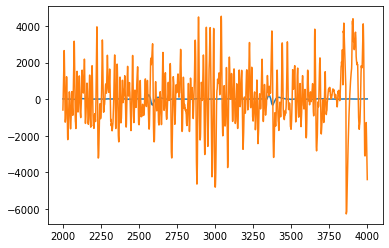

In [118]:
# Unstable Control #2 
df_ecg["S0411ECG.hea/ecg_0"][0:2000].plot()
df_ecg["S0411ECG.hea/ecg_1"][0:2000].plot()

#df_ecg["S0411ECG.hea/ecg_0"].plot()
#df_ecg["S0411ECG.hea/ecg_1"].plot()

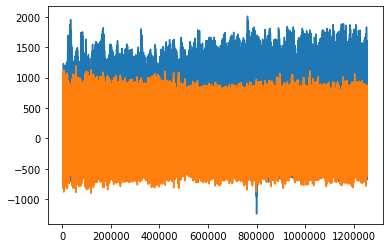

In [117]:
# Control #2
#df_ecg["S0317ECG.hea/ecg_0"][200000:210000].plot()
#df_ecg["S0317ECG.hea/ecg_1"][200000:210000].plot()

df_ecg["S0317ECG.hea/ecg_0"].plot()
df_ecg["S0317ECG.hea/ecg_1"].plot()

## Pre-processing
### Removing the first 2 seconds

In [115]:
df_ecg = df_ecg.drop(df_ecg.index[:2000])
for l in times:
    l[1] = int(l[1]) - 2000
    #l[2] = l[2] + datetime.timedelta(seconds=2)

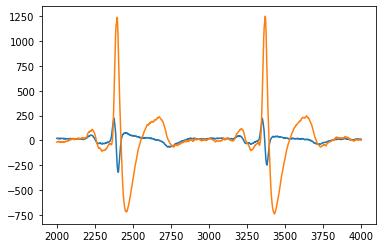

In [116]:
# Does it work?
# Diabetic #2
df_ecg["S0282ECG.hea/ecg_0"][0:2000].plot()
df_ecg["S0282ECG.hea/ecg_1"][0:2000].plot()

### Cleaning areas with moving averages that are out of bounds

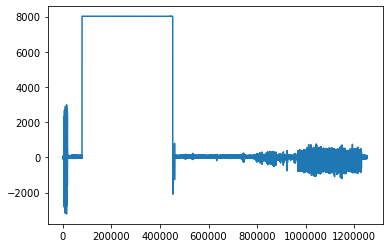

In [123]:
#Rolling window of means, with window size 50
N = 50
means = df_ecg["S0411ECG.hea/ecg_0"].rolling(window=N).mean().iloc[N-1:].values
plt.plot(means)

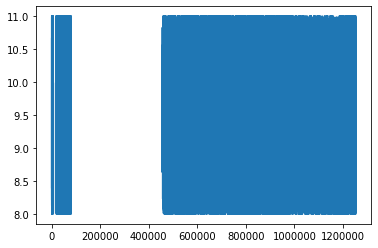

In [131]:
df = df_ecg["S0411ECG.hea/ecg_0"]
for m in range(1254327):
    if means[m] < 8 or means[m] > 11:
        means[m] = np.nan
        df[m] = np.nan
plt.plot(means)

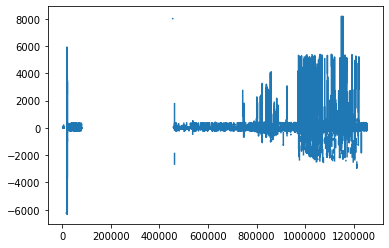

In [132]:
df_ecg["S0411ECG.hea/ecg_0"].plot()